# PHY480/905 Semester Project Template

**INSTRUCTIONS**: This is a template to help organize your project.  All projects must include the 5 major sections below (you do not need to use this template file).  Complete your work below and remove content in parentheses. 

#### PHY 480/905 Semester Project
### &#9989; Patrick Tutt
### &#9989; Steven VanCamp 
#### &#9989; April 16, 2023

# Optimizing tuned mass dampers

##  Introduction 

Background and Motivation:

Tuned mass dampers (TMDs) are mechanical devices that are used to reduce the vibrations of structures subjected to dynamic loads. They are typically used in tall buildings, long-span bridges, and offshore structures that are exposed to wind, earthquakes, and other environmental forces. These external factors induce these vibrations and cause harm to the building structure and jeopardize the saftey of occupants. 

The basic principle behind TMDs is to add a secondary mass-spring-damper system to the structure that is tuned to a specific frequency of vibration. By having a secondary mass-spring that moves the system out of phase with the main system, then the maximum ampliutde of osciallation can be reduced. 

There are two types of TMDs: Passive and active. Passive TMDs have a natural frequency of osciallation as where active TMDs utilize sensors to change their parameters like damping and stiffness to better damp the oscillations. 

The concept of TMDs has been around for over a century, but it wasn't until the 1970s that they started to be used widely in the construction industry. Today, TMDs are a standard component of the design of many tall buildings and long-span bridges, inlcuding the large skyscraper in Taiwan, the Taipei. 

TMDs have many advantages over other methods of vibration control, such as adding additional structural elements or increasing the stiffness of the structure. They are relatively inexpensive to install and maintain, and they do not significantly alter the aesthetic or functional properties of the structure. Most TMDs have an incredible effect on oscillation amplitude while weighing much less than the structure they are installed in.

Overall, TMDs are an important tool for engineers and designers to reduce the impact of dynamic loads on structures, and they continue to be an active area of research and development in the field of structural engineering.

Questions we hope to answer in our project: 
- Can we model a coupled mass-spring system?
- Do we observe damped oscillations of the larger mass? 
- Can we develop an algorithm to optimize the physical parameters of the system (spring constant and mass of dampener)? 
- Can the mass-spring system be applied to a more complicated scenario including multiple floors? 
- Can we optimize physical parameters in this case too? 


## Methodology

##### IMPORTANT NOTE: We used a Runge-Kutta method implemented in C++ to solve this system. This was done so that we can later use this method for the more complicated building case. An image of the output is shown below; however, the C++ code will be uploaded separately. 

The below spring-mass system obeys a simple 2nd order D.E. : 

$$
m_{1}\ddot{x_{1}} + b_{1}\dot{x_{1}} + k_{1}(x_{1} - L_{1}) - k_{2}(x_{2} - x_{1} - L_{2}) = 0
$$

$$
m_{2}\ddot{x_{2}} + b_{2}\dot{x_{2}} + k_{2}(x_{2} - x_{1} - L_{2}) = 0
$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
%%bash
fname_res="../results/spring_tmd_res.txt"
fname_res_noTMD="../results/spring_noTMD_res.txt"

mass_building=10.0
mass_dampner=3.0

run_time=20.0

g++ -O3 -o kinematics.exe ../src/kinematics.cpp

./kinematics.exe $fname_res $mass_building $mass_dampner $run_time
./kinematics.exe $fname_res_noTMD $mass_building 0.01 $run_time

rm kinematics.exe

In [ ]:
data_tmd = np.genfromtxt('../results/spring_tmd_res.txt', dtype='f8', delimiter=',', usecols=[0,1,2,3])
data_noTMD = np.genfromtxt('../results/spring_noTMD_res.txt', dtype='f8', delimiter=',', usecols=[0,1,2,3])

data_range = np.linspace(0,10, len(data_tmd[:,0]))

fig, ax1 = plt.subplots(1,2)
fig.set_size_inches(10,5)

ax1[0].plot(data_range, data_tmd[:,0], label='Mass 1')
ax1[0].plot(data_range, data_tmd[:,2], label='Mass 2')

ax1[0].legend()
ax1[0].set_title('Position of Spring Masses, Dampning')
ax1[0].set_xlabel('Time [s]')
ax1[0].set_ylabel('Mass Position [m]')

ax1[1].plot(data_range, data_noTMD[:,0], label='Mass 1')
ax1[1].plot(data_range, data_noTMD[:,2], label='Mass 2')

ax1[1].legend()
ax1[1].set_title('Position of Spring Masses, No Dampning')
ax1[1].set_xlabel('Time [s]')
ax1[1].set_ylabel('Mass Position [m]')

We are currenlty trying to expand this to a building model as shown below: 

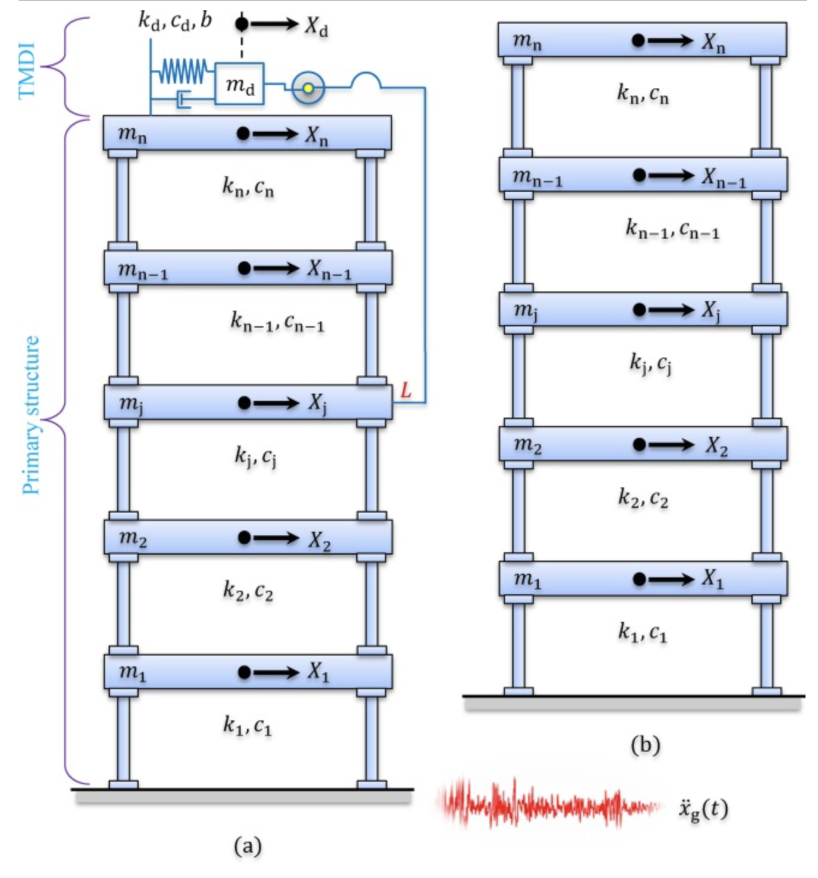

The above building can be described with a 2nd order D.E. : 

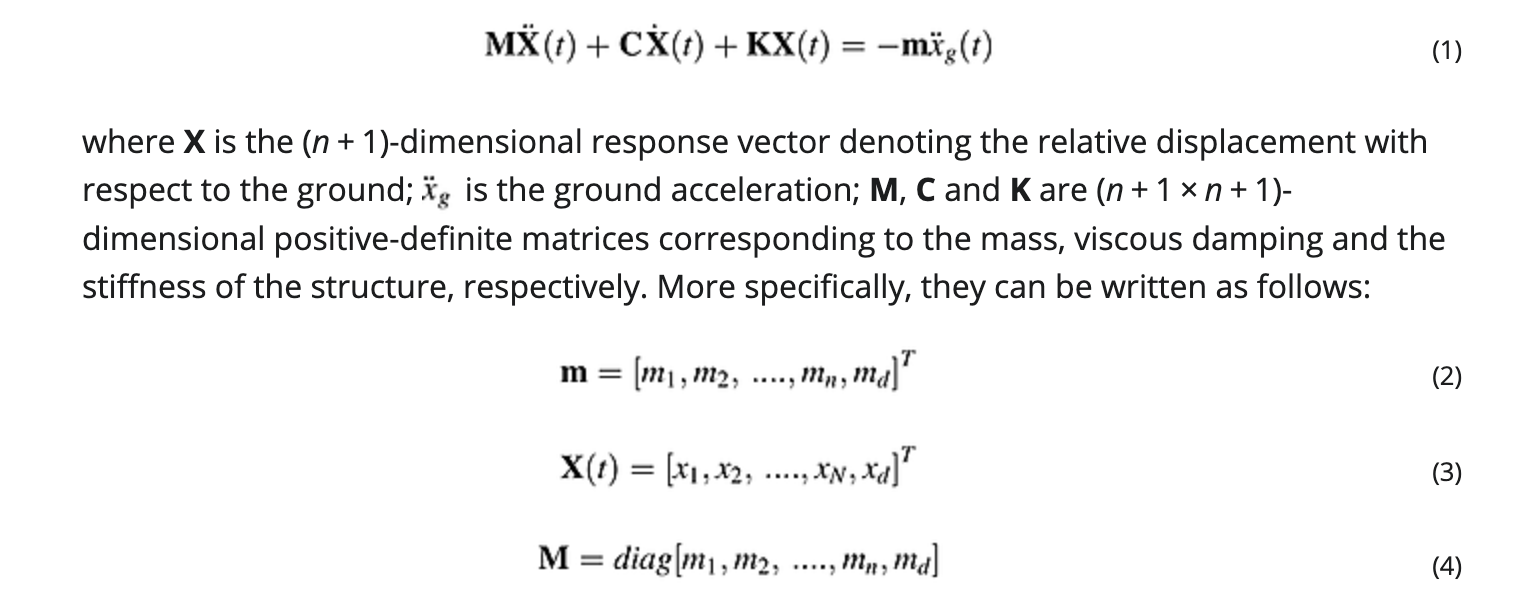

Which reduces to a first order equation: 

$$ \dot{Z} = AZ + H\ddot{x_{g}}(t) $$

where:

$$
Z = 
\begin{bmatrix}
X(t) \\
\dot{X}(t)
\end{bmatrix}
$$

$$
A = 
\begin{bmatrix}
0 & I \\
-M^{-1} K & -M^{-1} C
\end{bmatrix}
$$

$$
H = 
\begin{bmatrix}
0 \\
M^{-1}m
\end{bmatrix}
$$

We are currently working to solver this equation above for small story buildings.

## Results and Discussion

Below is a simple coupled mass-spring system shhowing how oscillations of one mass can be dampened.

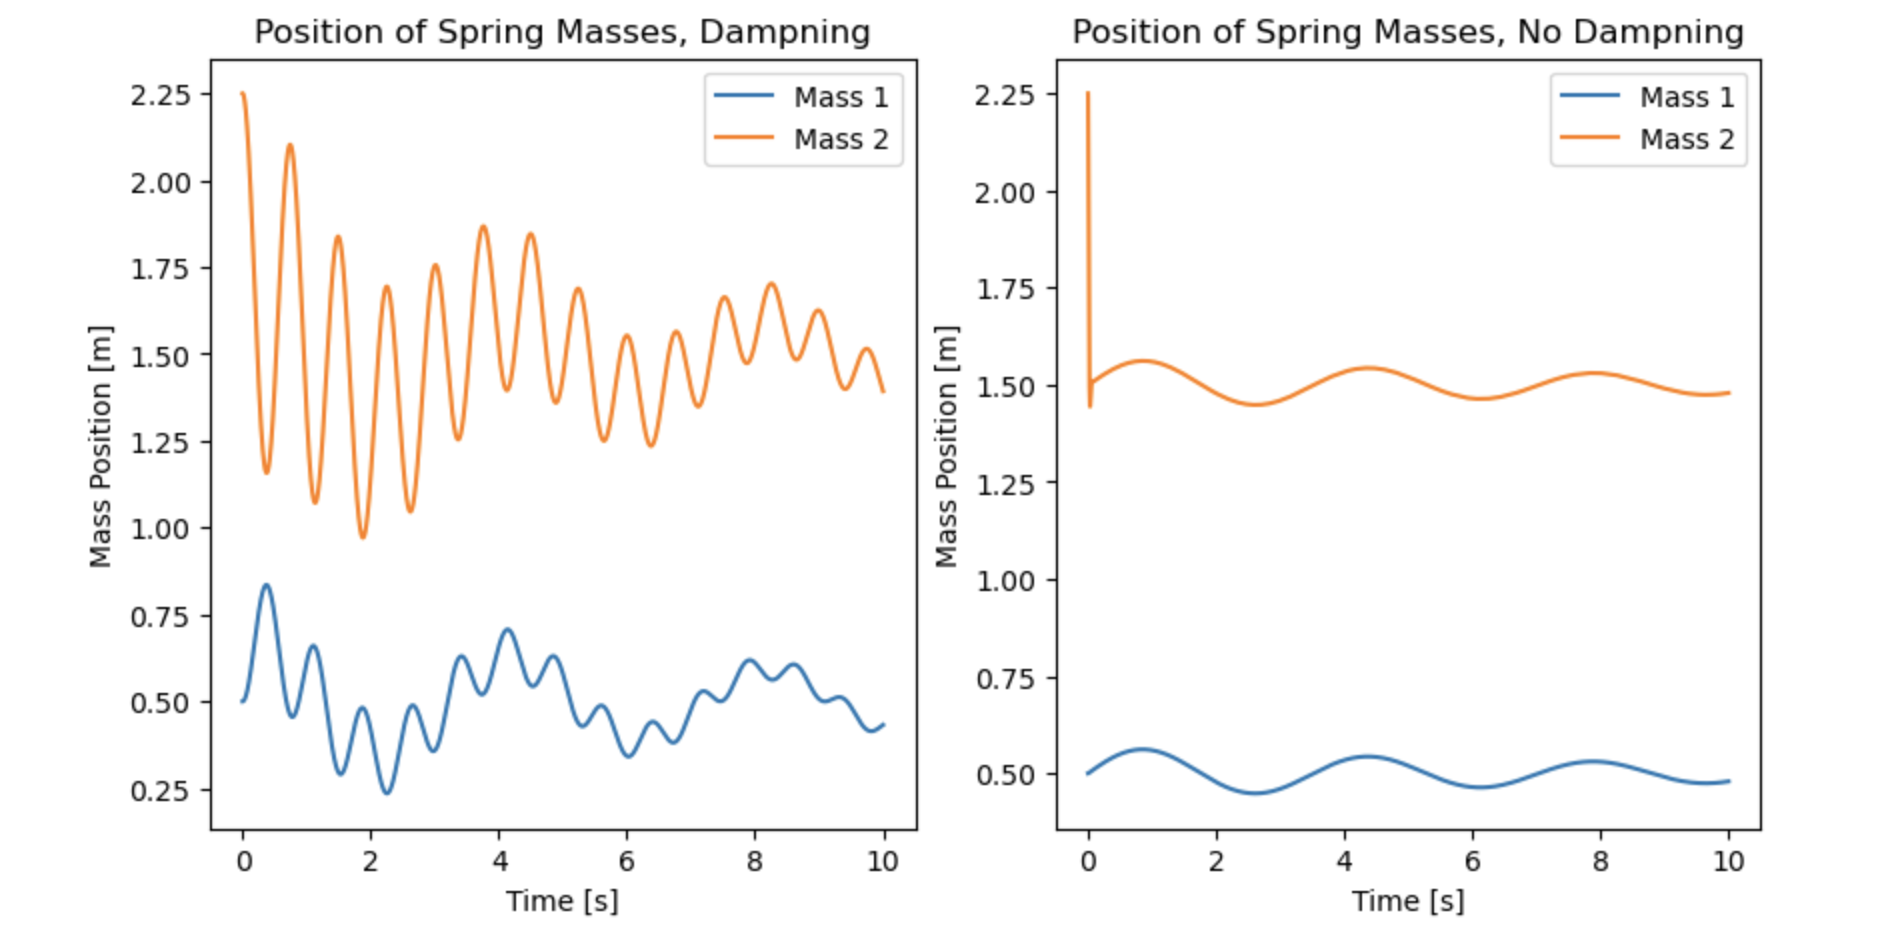

##  Conclusion and Perspectives

_(What did you learn from your results? What obstacles did you run into? What would you do differently next time? Clearly provide quantitative answers to your question(s)?  At least one of your questions should be answered with numbers.  That is, it is not sufficient to answer "yes" or "no", but rather to say something quantitative such as variable 1 increased roughly 10% for every 1 year increase in variable 2.)_

## References

_(List the source(s) for any data and/or literature cited in your project.  Ideally, this should be formatted using a formal citation format (MLA or APA or other, your choice!).   
Multiple free online citation generators are available such as <a href="http://www.easybib.com/style">http://www.easybib.com/style</a>. 
**Important:** if you use **any** code that you find on the internet for your project you **must** cite it or you risk losing most/all of the points for you project.)_

##  Appendices
